In [ ]:
#The process of filling in missing data with average data from the rest of the data set is called imputation. We will now use imputation to fill in the missing data from the Age column.

#The most basic form of imputation would be to fill in the missing Age data with the average Age value across the entire data set. However, there are better methods.

#We will fill in the missing Age values with the average Age value for the specific Pclass passenger class that the passenger belongs to. To understand why this is useful, consider the following boxplot:

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
train = pd.read_csv('C:/Users/Merin/Desktop/DATA CLEANING/titanic/train.csv')
df=pd.DataFrame(train)
print (df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

C:\Users\Merin\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

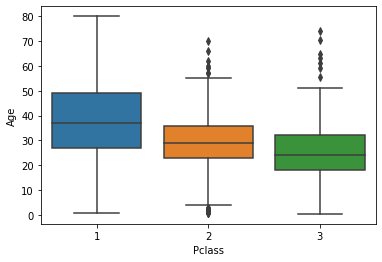

In [2]:
sns.boxplot(df['Pclass'], df['Age'])
#assign each class for each ages, pclasss=1, are the most aged people

In [5]:
#Pclass value 1, find the average for pclass=1

df[df['Pclass'] == 1]['Age'].mean()



38.233440860215055

In [6]:
#Pclass value 2

df[df['Pclass'] == 2]['Age'].mean()



29.87763005780347

In [8]:
#Pclass 3

df[df['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [14]:
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    if pd.isnull(age):

        if(passenger_class == 1):

            return df[df['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return df[df['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return df[df['Pclass'] == 3]['Age'].mean()    

    else:

        return age

In [15]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)
#apply every row in the dataframe using apply method

In [16]:
#verify any missing data in age column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#remove cabin coloumn that have too much misiing value
df.dropna('Cabin', axis=1, inplace = True)
df.dropna(inplace = True)
df.isnull().sum()

In [20]:
#handle categorical colounm like sex and embarked using dummy,hese assign a numerical value to each category of a non-numerical feature
#The get_dummies method does have one issue - it will create a new column for each value in the DataFrame column.
#This is called multicollinearity and it significantly reduces the predictive power of your algorithm.
#To remove this, we can add the argument drop_first = True to the get_dummies method like this:


#create regression model
sex_data=pd.get_dummies(df["Sex"],drop_first=True)
embarked_data = pd.get_dummies(df['Embarked'], drop_first = True)

In [24]:
#Adding Dummy Variables to the pandas DataFrame
#Next we need to add our new sex and embarked columns to the DataFrame.
#You can concatenate these data columns into the existing pandas DataFrame with the following code:
df = pd.concat([df, sex_data, embarked_data], axis = 1)

In [25]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')


In [27]:
#remove unwanted colsm
df.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')


In [28]:
 #everthig is numerical now
print(df)

     PassengerId  Survived  Pclass       Age  SibSp  Parch     Fare  male  Q  \
0              1         0       3  22.00000      1      0   7.2500     1  0   
1              2         1       1  38.00000      1      0  71.2833     0  0   
2              3         1       3  26.00000      0      0   7.9250     0  0   
3              4         1       1  35.00000      1      0  53.1000     0  0   
4              5         0       3  35.00000      0      0   8.0500     1  0   
..           ...       ...     ...       ...    ...    ...      ...   ... ..   
886          887         0       2  27.00000      0      0  13.0000     1  0   
887          888         1       1  19.00000      0      0  30.0000     0  0   
888          889         0       3  25.14062      1      2  23.4500     0  0   
889          890         1       1  26.00000      0      0  30.0000     1  0   
890          891         0       3  32.00000      0      0   7.7500     1  1   

     S  
0    1  
1    0  
2    1  
3  

In [30]:
#create training and etsting data
#divide our data into x values (the data we will be using to make predictions) and y values (the data we are attempting to predict). The following code handles this:
x_data=df['Survived']
y_data=df.drop('Survived',axis = 1)

In [31]:
from sklearn.model_selection import train_test_split

In [42]:
#using trainsplit data function generate tarining and testing data with 30% of test data
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)
print(x_training_data)
print(x_test_data)
print(y_training_data)
print(y_test_data)

465    0
11     1
50     0
312    0
648    0
      ..
372    0
713    0
644    1
861    0
53     1
Name: Survived, Length: 623, dtype: int64
495    0
840    0
219    0
220    1
597    0
      ..
566    0
491    0
643    1
116    0
294    0
Name: Survived, Length: 268, dtype: int64
     PassengerId  Pclass       Age  SibSp  Parch     Fare  male  Q  S
465          466       3  38.00000      0      0   7.0500     1  0  1
11            12       1  58.00000      0      0  26.5500     0  0  1
50            51       3   7.00000      4      1  39.6875     1  0  1
312          313       2  26.00000      1      1  26.0000     0  0  1
648          649       3  25.14062      0      0   7.5500     1  0  1
..           ...     ...       ...    ...    ...      ...   ... .. ..
372          373       3  19.00000      0      0   8.0500     1  0  1
713          714       3  29.00000      0      0   9.4833     1  0  1
644          645       3   0.75000      2      1  19.2583     0  0  0
861          862  

In [47]:
y_data = df['Survived']

x_data = df.drop('Survived', axis = 1)

#Split the data set into training data and test data

from sklearn.model_selection import train_test_split

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

#Create the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

#Train the model and create predictions

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

#Calculate performance metrics

from sklearn.metrics import classification_report

print(classification_report(y_test_data, predictions))

#Generate a confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       161
           1       0.83      0.65      0.73       107

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268

[[147  14]
 [ 37  70]]


C:\Users\Merin\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
df.isnull().sum() #to chevk any null values

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [ ]:
#Pros:

#Gives a better result than earlier methods
#Takes into account the covariance between the missing value column and other columns.
#Cons:

#Considered only as a proxy for the true values